In [10]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [11]:
# Define data transformer
img_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# Read data and transform
dataset = MNIST(root='./data', download=True, train=True, transform=img_transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False)
x,_ = next(iter(dataloader))

In [31]:
query_conv = nn.Conv2d(in_channels = 1 , out_channels = 1 , kernel_size= 1)
key_conv = nn.Conv2d(in_channels = 1 , out_channels = 1 , kernel_size= 1)
value_conv = nn.Conv2d(in_channels = 1 , out_channels = 1 , kernel_size= 1)
gamma = 1
softmax = nn.Softmax(dim=-1)

m_batchsize,C,width,height = x.size()
        
proj_query = query_conv(x).view(m_batchsize, -1, width*height).permute(0,2,1) # B * N * C
proj_key = key_conv(x).view(m_batchsize, -1, width*height) # B * C * N
energy = torch.bmm(proj_query, proj_key) # batch matrix-matrix product
attention = softmax(energy) # B * N * N
proj_value = value_conv(x).view(m_batchsize, -1, width*height) # B * C * N
out = torch.bmm(proj_value, attention.permute(0,2,1)) # batch matrix-matrix product
out = out.view(m_batchsize,C,width,height) # B * C * W * H
        
out1 = gamma*out + x

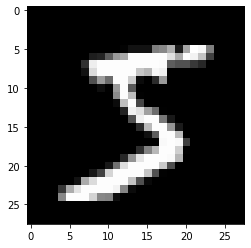

In [34]:
plt.imshow(key_conv(x)[0,0,:,:].detach().numpy(), cmap='gray')

In [35]:
key_conv(x)[0,0,:,:]

tensor([[-0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304],
        [-0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304],
        [-0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304],
        [-0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304, -0.0304,
         -0.0304, -0.0304, -0.0304, -0.0304, -0.0304

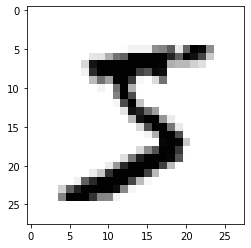

In [21]:
plt.imshow(out[0,0,:,:].detach().numpy(), cmap='gray')

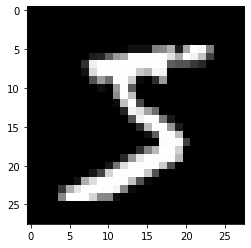

In [23]:
plt.imshow(out1[0,0,:,:].detach().numpy(), cmap='gray')